## Ejercicio 1
##### A)  Interpole los puntos:
p1 = (5.4, 3.2)
p2_i = (9.5, 0.7)
p3 = (12.3, -3.6)
De estos, el punto p2i
  debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos.

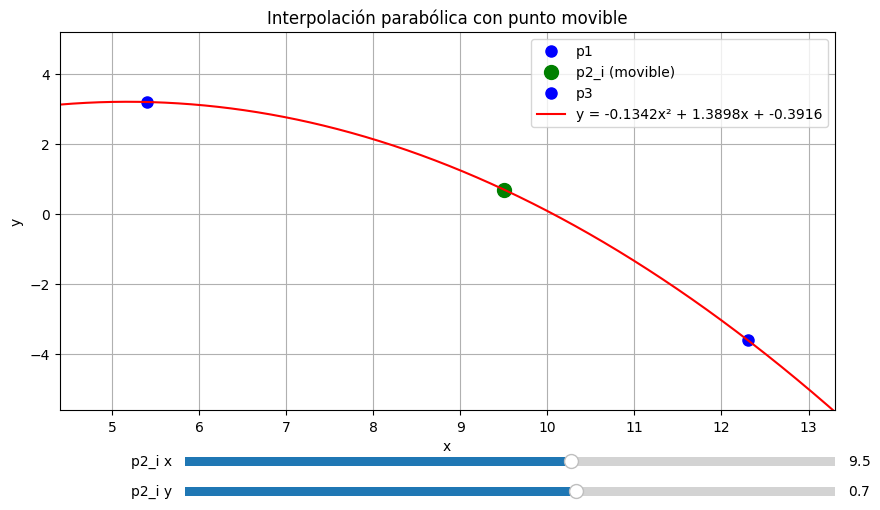

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Puntos iniciales
p1 = (5.4, 3.2)
p2_i = [9.5, 0.7]  # Lista para poder modificarla
p3 = (12.3, -3.6)

# Función para calcular los coeficientes de la parábola
def calcular_coeficientes(puntos):
    x = [p[0] for p in puntos]
    y = [p[1] for p in puntos]

    # Sistema de ecuaciones para y = ax² + bx + c
    A = np.array([[x[0]**2, x[0], 1],
                  [x[1]**2, x[1], 1],
                  [x[2]**2, x[2], 1]])
    b = np.array([y[0], y[1], y[2]])

    # Resolver el sistema
    coeficientes = np.linalg.solve(A, b)
    return coeficientes

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.25)

# Configurar los límites de los ejes
x_min = min(p1[0], p2_i[0], p3[0]) - 1
x_max = max(p1[0], p2_i[0], p3[0]) + 1
y_min = min(p1[1], p2_i[1], p3[1]) - 2
y_max = max(p1[1], p2_i[1], p3[1]) + 2
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Graficar los puntos
punto1, = ax.plot(p1[0], p1[1], 'bo', markersize=8, label='p1')
punto2, = ax.plot(p2_i[0], p2_i[1], 'go', markersize=10, label='p2_i (movible)')
punto3, = ax.plot(p3[0], p3[1], 'bo', markersize=8, label='p3')

# Calcular y graficar la parábola inicial
coef = calcular_coeficientes([p1, p2_i, p3])
x_parabola = np.linspace(x_min, x_max, 1000)
y_parabola = coef[0] * x_parabola**2 + coef[1] * x_parabola + coef[2]
parabola, = ax.plot(x_parabola, y_parabola, 'r-', label=f'y = {coef[0]:.4f}x² + {coef[1]:.4f}x + {coef[2]:.4f}')

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interpolación parabólica con punto movible')
ax.grid(True)

# Crear sliders
ax_x = plt.axes([0.25, 0.15, 0.65, 0.03])
ax_y = plt.axes([0.25, 0.1, 0.65, 0.03])
slider_x = Slider(ax_x, 'p2_i x', x_min+1, x_max-1, valinit=p2_i[0])
slider_y = Slider(ax_y, 'p2_i y', y_min+1, y_max-1, valinit=p2_i[1])

# Variable para seguimiento de arrastre
punto_arrastrado = False

# Función para actualizar la gráfica
def actualizar():
    # Actualizar posición del punto
    punto2.set_data(p2_i[0], p2_i[1])

    # Recalcular la parábola
    coef = calcular_coeficientes([p1, p2_i, p3])
    y_parabola = coef[0] * x_parabola**2 + coef[1] * x_parabola + coef[2]
    parabola.set_data(x_parabola, y_parabola)
    parabola.set_label(f'y = {coef[0]:.4f}x² + {coef[1]:.4f}x + {coef[2]:.4f}')
    ax.legend()

    fig.canvas.draw_idle()

# Función para manejar los sliders
def actualizar_desde_slider(val):
    p2_i[0] = slider_x.val
    p2_i[1] = slider_y.val
    actualizar()

slider_x.on_changed(actualizar_desde_slider)
slider_y.on_changed(actualizar_desde_slider)

# Eventos para arrastrar el punto directamente
def on_press(event):
    global punto_arrastrado
    if event.inaxes != ax:
        return

    if abs(event.xdata - p2_i[0]) < 0.5 and abs(event.ydata - p2_i[1]) < 0.5:
        punto_arrastrado = True

def on_motion(event):
    global punto_arrastrado
    if punto_arrastrado and event.inaxes == ax:
        p2_i[0] = event.xdata
        p2_i[1] = event.ydata
        slider_x.set_val(p2_i[0])
        slider_y.set_val(p2_i[1])
        actualizar()

def on_release(event):
    global punto_arrastrado
    punto_arrastrado = False

fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('motion_notify_event', on_motion)
fig.canvas.mpl_connect('button_release_event', on_release)

plt.show()